[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task3_dmrf_OOP.ipynb)

# Задание
Реализовать с помощью объектно-ориентированного подхода предыдущие 2 задания. Создайте для каждой из задач отдельный класс, который позволяет ее решить.

* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe, а также в excel, pickle, БД

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных

*  Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.



In [ ]:
import requests
from tqdm import tqdm
import pandas as pd

## Список объектов

In [ ]:
offset_ = 1
limit_ = 1000
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)
objects_data = res.json()

In [ ]:
objids = [x.get('objId') for x in objects_data.get('data').get('list')]
objids

In [ ]:
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/13397'

In [ ]:
res = requests.get(url)
objects_data = res.json()
objects_data.get('data')

In [ ]:
objects_data.get('data').get('id')

In [ ]:
print('Создаем DS')
col = ('ID дома:','Застройщик','Ввод в эксплуатацию','Выдача ключей','Средняя цена за 1 м²','Класс недвижимости'
       ,'Количество квартир','Количество этажей','Жилая площадь, м²','Высота потолков, м'
       , 'Количество мест в паркинге','Количество подъездов','Количество пассажирских лифтов'
      )
dict_ds = {k:[] for k in col}
dict_ds

In [ ]:
# objids_ = [29679,13383]
for idx in tqdm(objids[:10]):
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{idx}'
    res = requests.get(url)
    objects_data = res.json()
    dict_ds['ID дома:'].append(objects_data.get('data').get('id'))
    dict_ds['Застройщик'].append(objects_data.get('data').get('developer').get('devShortNm'))
    dict_ds['Ввод в эксплуатацию'].append(objects_data.get('data').get('objReady100PercDt'))
    dict_ds['Выдача ключей'].append(objects_data.get('data').get('objTransferPlanDt'))
    dict_ds['Средняя цена за 1 м²'].append(objects_data.get('data').get('objPriceAvg'))
    dict_ds['Класс недвижимости'].append(objects_data.get('data').get('objLkClassDesc'))
    dict_ds['Количество квартир'].append(objects_data.get('data').get('objElemLivingCnt'))
    dict_ds['Количество этажей'].append(objects_data.get('data').get('floorMax'))
    dict_ds['Жилая площадь, м²'].append(objects_data.get('data').get('objSquareLiving'))
    dict_ds['Высота потолков, м'].append(objects_data.get('data').get('objLivCeilingHeight'))
    dict_ds['Количество мест в паркинге'].append(objects_data.get('data').get('objElemParkingCnt'))
    dict_ds['Количество подъездов'].append(objects_data.get('data').get('objLivElemEntrCnt'))
    dict_ds['Количество пассажирских лифтов'].append(objects_data.get('data').get('objElevatorPassengerCnt'))
dict_ds

In [ ]:
pd.DataFrame(dict_ds)

In [ ]:
dict_ds

# Решение по заданию

In [8]:
import requests
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [9]:
class DomIdLoader:
    def __init__(self):
        self.offset_ = 1
        self.limit_ = 1000
        self.url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={self.offset_}&limit={self.limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
        self.objects_data = None

    def get_ids(self):
        res = requests.get(self.url)
        self.objects_data = res.json()
#         return self.objects_data

    def show_ids(self, ):
        self.objids = [x.get('objId') for x in self.objects_data.get('data').get('list')]
#         print(self.objids)
        return self.objids

In [10]:
class ObjectInfoExtractor:
    def __init__(self,list_idx):
        self.list_idx = list_idx
        self.dict_ds  = None

    def load_data(self):
        print('Создаем DS')
        col = ('ID дома:','Застройщик','Ввод в эксплуатацию','Выдача ключей','Средняя цена за 1 м²','Класс недвижимости'
               ,'Количество квартир','Количество этажей','Жилая площадь, м²','Высота потолков, м'
               , 'Количество мест в паркинге','Количество подъездов','Количество пассажирских лифтов'
              )
        dict_ds = {k:[] for k in col}
        
        for idx in tqdm(self.list_idx):
            url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{idx}'
            res = requests.get(url)
            objects_data = res.json()
            dict_ds['ID дома:'].append(objects_data.get('data').get('id'))
            dict_ds['Застройщик'].append(objects_data.get('data').get('developer').get('devShortNm'))
            dict_ds['Ввод в эксплуатацию'].append(objects_data.get('data').get('objReady100PercDt'))
            dict_ds['Выдача ключей'].append(objects_data.get('data').get('objTransferPlanDt'))
            dict_ds['Средняя цена за 1 м²'].append(objects_data.get('data').get('objPriceAvg'))
            dict_ds['Класс недвижимости'].append(objects_data.get('data').get('objLkClassDesc'))
            dict_ds['Количество квартир'].append(objects_data.get('data').get('objElemLivingCnt'))
            dict_ds['Количество этажей'].append(objects_data.get('data').get('floorMax'))
            dict_ds['Жилая площадь, м²'].append(objects_data.get('data').get('objSquareLiving'))
            dict_ds['Высота потолков, м'].append(objects_data.get('data').get('objLivCeilingHeight'))
            dict_ds['Количество мест в паркинге'].append(objects_data.get('data').get('objElemParkingCnt'))
            dict_ds['Количество подъездов'].append(objects_data.get('data').get('objLivElemEntrCnt'))
            dict_ds['Количество пассажирских лифтов'].append(objects_data.get('data').get('objElevatorPassengerCnt'))
        self.dict_ds = dict_ds
        
#         return self.dict_ds
        

    def df_converter(self):
        print('Создаем DataFrame')
        data = pd.DataFrame(self.dict_ds)
        data['Высота потолков, м'] = (data['Высота потолков, м']
                                                         .fillna('0')
                                                         .str.replace(',', '.')
                                                         .str.split('-')
                                                        #  .apply(lambda l: np.nan if any(pd.isna(l)) else )
                                                         .apply(lambda l: list(map(float, l)))
                                                        .apply(np.mean)
                                                        )
        data['Количество подъездов'] = data['Количество подъездов'].fillna(0)
        return data

In [11]:
a = DomIdLoader()
a.get_ids()

In [12]:
c = ObjectInfoExtractor(a.show_ids())

In [13]:
c.load_data()

  0%|          | 1/1000 [00:00<02:02,  8.16it/s]

Создаем DS


100%|██████████| 1000/1000 [02:08<00:00,  7.81it/s]


In [14]:
data = c.df_converter()

Создаем DataFrame


In [15]:
data.head()

,ID дома:,Застройщик,Ввод в эксплуатацию,Выдача ключей,Средняя цена за 1 м²,Класс недвижимости,Количество квартир,Количество этажей,"Жилая площадь, м²","Высота потолков, м",Количество мест в паркинге,Количество подъездов,Количество пассажирских лифтов
0,13397,2МЕН ГРУПП,2024-12-31,28-02-2025 12:00,45523.0,Элитный,65,12,6248.51,2.96,0,0,5.0
1,13398,2МЕН ГРУПП,2024-12-31,28-02-2025 12:00,47886.0,Элитный,43,10,4812.98,2.96,0,0,3.0
2,13383,2МЕН ГРУПП,2022-12-31,28-02-2023 12:00,53109.0,Элитный,68,20,6293.78,2.80,31,0,5.0
3,13391,2МЕН ГРУПП,2022-12-31,28-02-2023 12:00,55893.0,Элитный,44,12,4297.44,2.80,41,0,2.0
4,13399,2МЕН ГРУПП,2024-12-31,28-02-2025 12:00,50768.0,Элитный,0,1,0.00,0.00,125,0,8.0


In [16]:
class Saver:
    def __init__(self, data):
        self.data = data

    def save_csv(self):
        print('сохраняем в csv')
        self.data.to_csv(f'/Users/19282873/Downloads/python-first-part-main/notebooks/hometasks/File/csv_1.csv')
        print('CSV создан')
        
    def save_xl(self):
        print('сохраняем в excel')
        self.data.to_excel(f'/Users/19282873/Downloads/python-first-part-main/notebooks/hometasks/File/excel_1.xlsx', sheet_name = 'Sheet1')
        print('Excel создан')
        
    def save_sql(self):
        pass

class Visualizer:
    def __init__(self,data,devel):
        self.data = data
        self.devel = devel

        
    def make_boxplot(self, develop):
        df = self.data
        
        @interact
        def box_plotter(
                        y = ['Средняя цена за 1 м²','Жилая площадь, м²','Высота потолков, м'
                                  ,'Количество мест в паркинге','Количество пассажирских лифтов'],
                        develop = list(self.data['Класс недвижимости'].unique())
                       ):
            devel = self.data['Класс недвижимости'] == develop
            sns.catplot(x='Застройщик', 
                        y= y, 
                        aspect=3,
                        kind="box", 
                        showfliers=False,
                        data=self.data[devel]);
        
    
    
    def make_heatmap(self):
        corr = self.data[['Средняя цена за 1 м²','Жилая площадь, м²','Высота потолков, м'
                          ,'Количество мест в паркинге','Количество пассажирских лифтов']].corr()
        sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="inferno")

In [17]:
d = Visualizer(data,'Элитный')

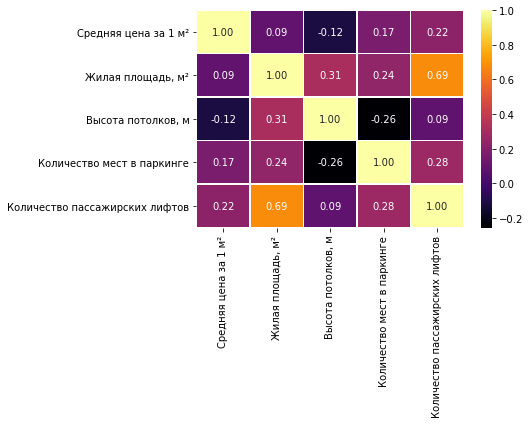

In [19]:
d.make_heatmap()